In [1]:
import os

In [2]:
data_dir = 'D:\ALL\Study Materials\ML Projects\cell_images\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [7]:
test_path

'D:\\ALL\\Study Materials\\ML Projects\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

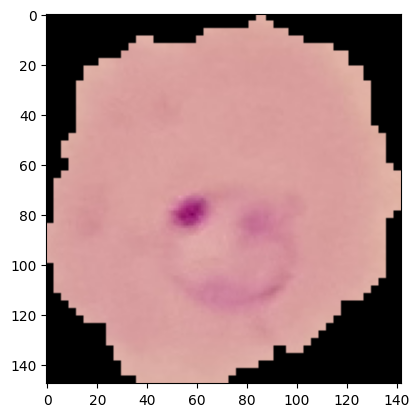

In [12]:
plt.imshow(imread(para_cell))

In [13]:
os.listdir(train_path+'uninfected')[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [14]:
uninfected_cell = train_path+'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
plt.imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

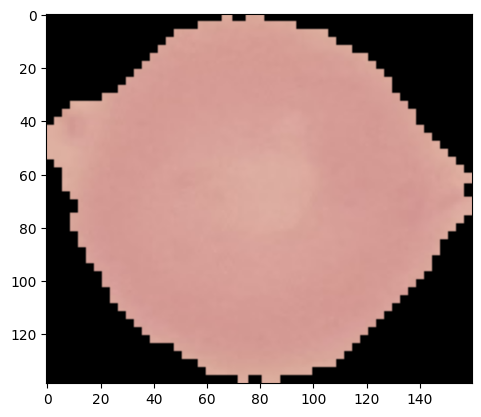

In [16]:
plt.imshow(plt.imread(uninfected_cell))

In [17]:
#len(os.listdir(train_path+'parasitized'))

In [18]:
#len(os.listdir(train_path+'uninfected'))

In [19]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path+'uninfected\\' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

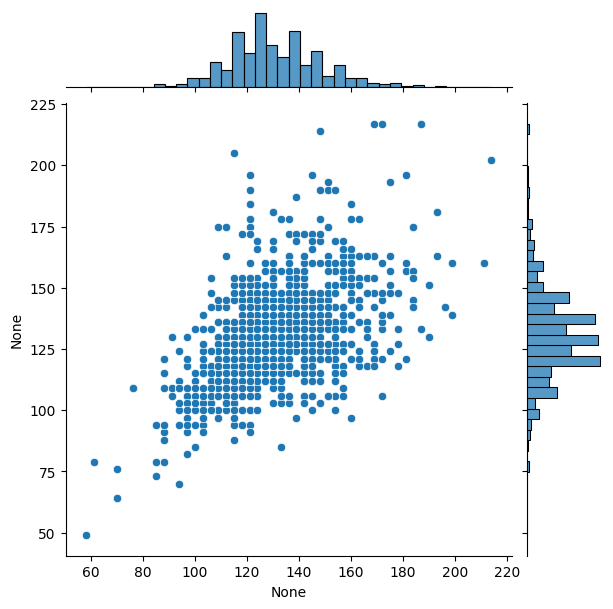

In [20]:
sns.jointplot(x=dim1,y=dim2)

In [21]:
np.mean(dim1)

np.float64(130.92538461538462)

In [22]:
np.mean(dim2)

np.float64(130.75)

In [23]:
image_shape = (130,130,3)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,
                              shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest'
                              )

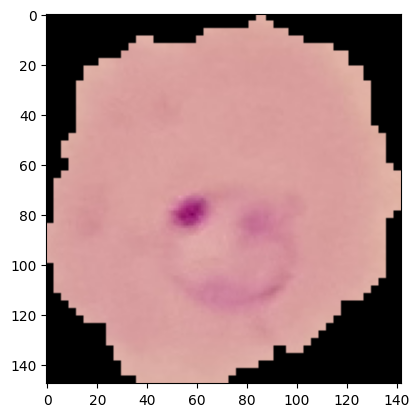

In [31]:
para_img = imread(para_cell)
plt.imshow(para_img)

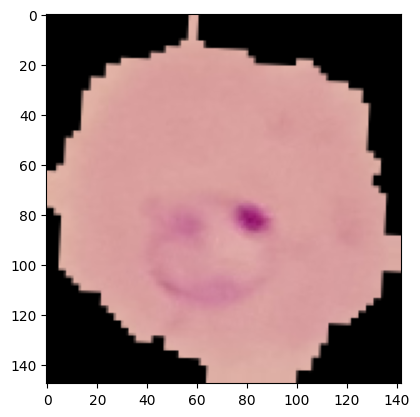

In [33]:
plt.imshow(image_gen.random_transform(para_img))

In [35]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Dropout, Flatten

In [42]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
batch_size=16

In [47]:
image_shape[:2]

(130, 130)

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                               color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                               color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [52]:
results=model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

C:\Users\dell\anaconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 532s 340ms/step - accuracy: 0.5321 - loss: 2.2499 - val_accuracy: 0.5350 - val_loss: 0.6903
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 220s 141ms/step - accuracy: 0.5658 - loss: 0.6845 - val_accuracy: 0.5746 - val_loss: 0.6731
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 297s 191ms/step - accuracy: 0.5953 - loss: 0.6730 - val_accuracy: 0.5831 - val_loss: 0.6740
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 286s 183ms/step - accuracy: 0.5979 - loss: 0.6686 - val_accuracy: 0.5992 - val_loss: 0.6822


In [53]:
model.metrics_names

['loss', 'compile_metrics']

In [55]:
pred = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step


In [56]:
pred

array([[0.17140867],
       [0.43043214],
       [0.15550436],
       ...,
       [0.48746917],
       [0.64828753],
       [0.22727443]], dtype=float32)

In [57]:
metrics = pd.DataFrame(model.history.history)

In [58]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.540428,0.922139,0.535000,0.690259
1,0.570759,0.681744,0.574615,0.673104
2,0.594599,0.673293,0.583077,0.674048
3,0.599086,0.668719,0.599231,0.682191


<Axes: >

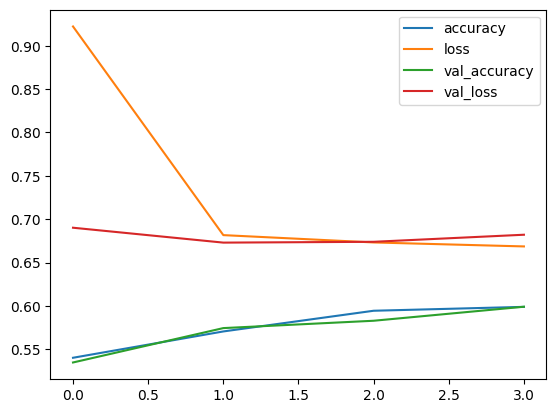

In [59]:
metrics.plot()

<Axes: >

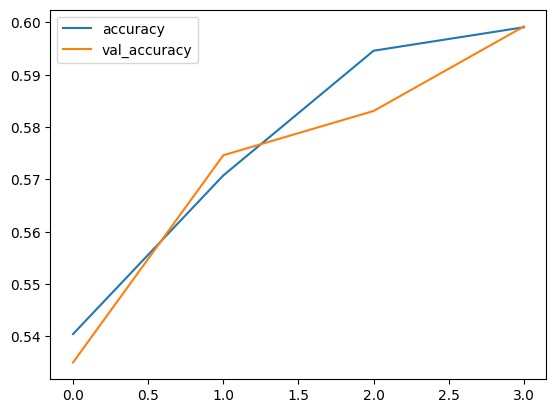

In [60]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

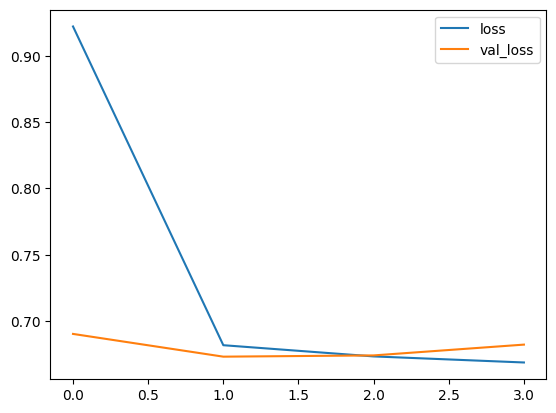

In [61]:
metrics[['loss','val_loss']].plot()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
predictions = pred>0.5

In [67]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1300
           1       0.60      0.62      0.61      1300

    accuracy                           0.60      2600
   macro avg       0.60      0.60      0.60      2600
weighted avg       0.60      0.60      0.60      2600



In [68]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [69]:
confusion_matrix(test_image_gen.classes,predictions)

array([[757, 543],
       [498, 802]])

In [70]:
para_cell

'D:\\ALL\\Study Materials\\ML Projects\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [71]:
from tensorflow.keras.preprocessing import image

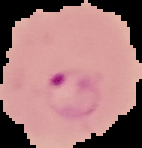

In [72]:
image.load_img(para_cell)

In [73]:
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [74]:
my_image = image.load_img(para_cell,target_size=image_shape)

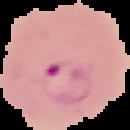

In [75]:
my_image

In [76]:
my_img_arr = image.img_to_array(my_image)

In [77]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [78]:
my_img_arr.shape

(130, 130, 3)

In [79]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [80]:
my_img_arr.shape

(1, 130, 130, 3)

In [81]:
model.predict(my_img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[0.66990376]], dtype=float32)

In [82]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}